<a href="https://colab.research.google.com/github/Namgyoung/Python_Class/blob/main/Python_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Covid Data
import pandas as pd
base = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/'
file_confirmed = base+'time_series_covid19_confirmed_global.csv'
covid = pd.read_html(file_confirmed)[0]
covid[1]=covid[1].apply(lambda x: x.replace('Korea, South', 'South Korea'))
display(covid.head())

,0,1
0,NaN,"Province/State,Country/Region,Lat,Long,1/22/20..."
1,NaN,",Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,..."
2,NaN,",Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0..."
3,NaN,",Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,..."
4,NaN,",Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,..."


In [ ]:
import numpy as np
cols = covid.iloc[0,1].split(',')
data = pd.DataFrame(columns=cols)
for i in range(1, covid.shape[0]):          #Create an empty dataframe with the above columns
#for i in range(1, 2):
    ddd = covid.iloc[i,1]
    ddd = ddd.split(',')
    try:
        series = pd.Series(ddd, index=cols)
        data = data.append(series, ignore_index=True)
    except Exception as err:
        print(ddd[0:4])
data.head()                   #모든 data를 다 보고싶으면 pd.options.display.max_columns=10000000 이런식으로 설정

['"Bonaire', ' Sint Eustatius and Saba"', 'Netherlands', '12.1784']
['"Saint Helena', ' Ascension and Tristan da Cunha"', 'United Kingdom', '-7.9467']


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157171,157190,157218,157260,157289,157359,157387,157412,157431,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666


In [ ]:
South_Korea = data[data['Country/Region'].str.contains('Korea')].copy(deep=True)
South_Korea = South_Korea.T[4:]
South_Korea.head(10)

,160
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,3
1/27/20,4
1/28/20,4
1/29/20,4
1/30/20,4
1/31/20,11


In [ ]:
South_Korea.reset_index(inplace = True)
South_Korea.head()

,index,160
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,3


In [ ]:
South_Korea.columns = ['DT', 'CASES']
South_Korea.head()

,DT,CASES
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,3


In [ ]:
South_Korea.dtypes

DT       object
CASES    object
dtype: object

In [ ]:
South_Korea.CASES = South_Korea.CASES.astype(int)
South_Korea.dtypes

DT       object
CASES     int64
dtype: object

In [ ]:
South_Korea.DT = pd.to_datetime(South_Korea.DT)
South_Korea.dtypes

DT       datetime64[ns]
CASES             int64
dtype: object

In [ ]:
South_Korea.head()

,DT,CASES
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


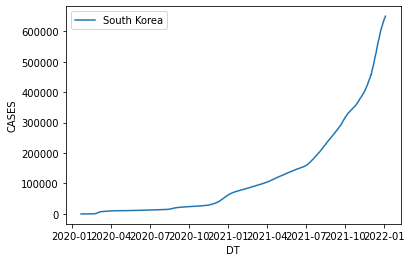

In [ ]:
#to visualize, use seaborn function
import seaborn as sns
sns.lineplot(x='DT', y='CASES', data = South_Korea, label = 'South Korea')

In [ ]:
#Take a look at the cases in China!
China = data[data['Country/Region'].str.contains('China')].copy(deep=True)
China.head(10)

In [ ]:
China.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'], inplace=True)
China

In [ ]:
China.dtypes

In [ ]:
for i in range(China.shape[1]):
  China.iloc[:,i] = China.iloc[:,i].astype(int)
China.dtypes

In [ ]:
chn = China.sum(axis=0).reset_index()
chn

In [ ]:
chn.columns = ['DT', 'CASES']
chn.DT = pd.to_datetime(chn.DT)
chn.head()

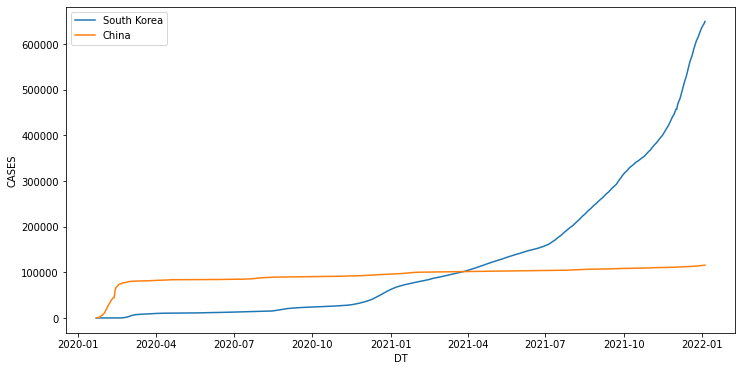

In [ ]:
from matplotlib.pylab import plt
fig, ax = plt.subplots(1,1, figsize =(12,6))
sns.lineplot(x='DT', y='CASES', data = South_Korea, label = 'South Korea')
sns.lineplot(x='DT', y='CASES', data = chn, label = 'China')

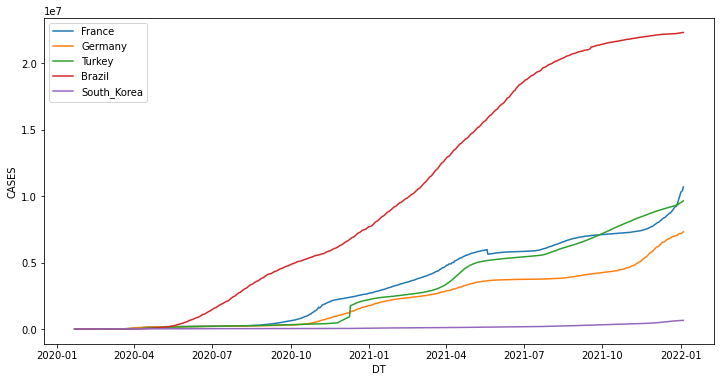

In [ ]:
#Generalizing the exercise!
def getCovidData(data, country):
    df = data[data['Country/Region'].str.contains(country)].copy(deep=True)
    df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'], inplace=True)
    df

    for i in range(df.shape[1]):
        df.iloc[:,i] = df.iloc[:,i].astype(int)

    df = df.sum(axis=0).reset_index()

    df.columns=['DT', 'CASES']
    df.DT = pd.to_datetime(df.DT)
    return df

France = getCovidData(data, 'France')
Germany = getCovidData(data, 'Germany')
Turkey = getCovidData(data, 'Turkey')
Brazil = getCovidData(data, 'Brazil')

from matplotlib.pylab import plt
fig, ax = plt.subplots(1,1, figsize =(12,6))
sns.lineplot(x='DT', y='CASES', data = France, label = 'France')
sns.lineplot(x='DT', y='CASES', data = Germany, label = 'Germany')
sns.lineplot(x='DT', y='CASES', data = Turkey, label = 'Turkey')
sns.lineplot(x='DT', y='CASES', data = Brazil, label = 'Brazil')
sns.lineplot(x='DT', y='CASES', data = South_Korea, label = 'South_Korea')

Enter Country: Poland
Enter Country: Turkey
Enter Country: france


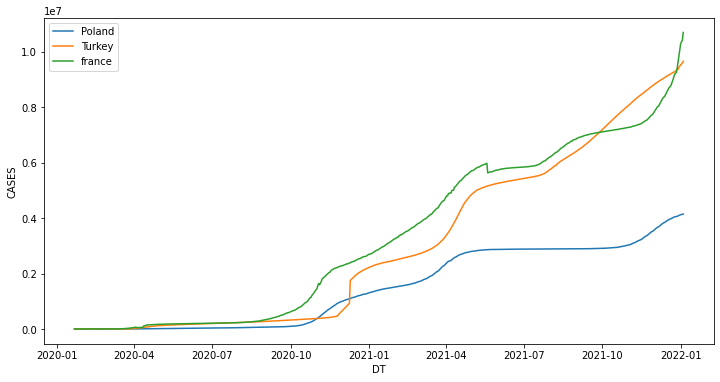

In [ ]:
#prompt the user to enter country!
def getCovidData(data, country):
    df = data[data['Country/Region'].str.contains(country, case=False)].copy(deep=True)     #case=False를 넣어줌으로써 user가 lowercase로 국가명을 적어도 작동하도록!
    df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'], inplace=True)
    df

    for i in range(df.shape[1]):
        df.iloc[:,i] = df.iloc[:,i].astype(int)

    df = df.sum(axis=0).reset_index()

    df.columns=['DT', 'CASES']
    df.DT = pd.to_datetime(df.DT)
    return df

d={}
for i in range(3):
  country = input('Enter Country: ')
  d[country] = getCovidData(data, country)

from matplotlib.pylab import plt
fig, ax = plt.subplots(1,1, figsize =(12,6))
for country in d:
  sns.lineplot(x='DT', y='CASES', data = d[country], label = country)

Enter Countries separated by space: turkey germany canada italy


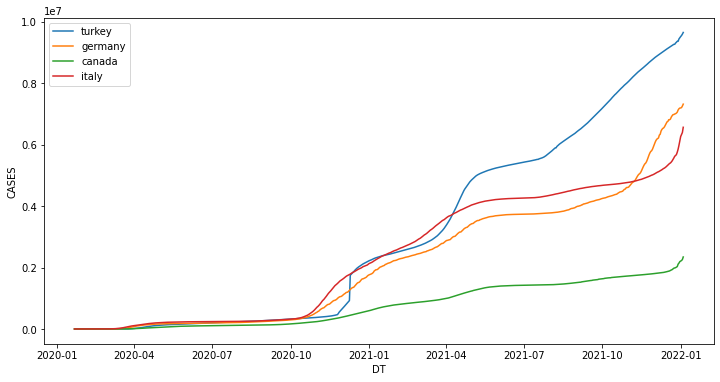

In [ ]:
#another way!
def getCovidData(data, country):
    df = data[data['Country/Region'].str.contains(country, case=False)].copy(deep=True)     #case=False를 넣어줌으로써 user가 lowercase로 국가명을 적어도 작동하도록!
    df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'], inplace=True)
    df

    for i in range(df.shape[1]):
        df.iloc[:,i] = df.iloc[:,i].astype(int)

    df = df.sum(axis=0).reset_index()

    df.columns=['DT', 'CASES']
    df.DT = pd.to_datetime(df.DT)
    return df

d={}
countries = input('Enter Countries separated by space: ')
countries = countries.split()
for country in countries:
  d[country] = getCovidData(data, country)

from matplotlib.pylab import plt
fig, ax = plt.subplots(1,1, figsize =(12,6))
for country in d:
  sns.lineplot(x='DT', y='CASES', data = d[country], label = country)

In [ ]:
#Sorting Data
dates = pd.date_range(start='1970-01-01', end='1999-12-31', freq='d')     #freq는 y, d, m 다 가능!
len(dates)

dts = np.random.choice(dates, size=10)
df = pd.DataFrame({'DOB':dts})
df['Student'] = ['Student_'+str(i) for i in range(len(dts))]
df

,DOB,Student
0,1971-08-22,Student_0
1,1971-01-07,Student_1
2,1977-11-30,Student_2
3,1971-01-26,Student_3
4,1997-12-10,Student_4
5,1978-02-08,Student_5
6,1982-06-20,Student_6
7,1971-01-26,Student_7
8,1999-10-01,Student_8
9,1987-12-18,Student_9


In [ ]:
df.sort_values('DOB', ascending=False)

,DOB,Student
8,1999-10-01,Student_8
4,1997-12-10,Student_4
9,1987-12-18,Student_9
6,1982-06-20,Student_6
5,1978-02-08,Student_5
2,1977-11-30,Student_2
0,1971-08-22,Student_0
3,1971-01-26,Student_3
7,1971-01-26,Student_7
1,1971-01-07,Student_1


In [ ]:
df.sort_values('DOB', ascending=False, inplace=True)        #inplace=True 넣어주면 df가 바뀜!
df

,DOB,Student
8,1999-10-01,Student_8
4,1997-12-10,Student_4
9,1987-12-18,Student_9
6,1982-06-20,Student_6
5,1978-02-08,Student_5
2,1977-11-30,Student_2
0,1971-08-22,Student_0
3,1971-01-26,Student_3
7,1971-01-26,Student_7
1,1971-01-07,Student_1


In [ ]:
dates1 = pd.date_range(start='1980-01-01', end='1980-12-31', freq='d')
len(dates1)

dates2=pd.date_range(start='1998-01-01', end='2001-12-31', freq='d')
len(dates2)

dts1=np.random.choice(dates1, size=100)
dts2=np.random.choice(dates2, size=100)
df=pd.DataFrame({'DOB':dts1, 'Graduation':dts2})
df['Student']=['Student_'+str(i) for i in range(len(dts))]
df

,DOB,Graduation,Student
0,1980-10-23,2001-02-24,Student_0
1,1980-08-11,1998-10-14,Student_1
2,1980-06-17,1999-07-16,Student_2
3,1980-09-29,2001-10-09,Student_3
4,1980-12-16,1998-09-09,Student_4
...,...,...,...
95,1980-09-05,1998-08-02,Student_95
96,1980-10-31,1998-06-22,Student_96
97,1980-06-20,1998-05-14,Student_97
98,1980-11-28,1999-07-03,Student_98


In [ ]:
df.sort_values(['DOB', 'Graduation'], ascending=[True, False])

,DOB,Graduation,Student
91,1980-01-05,1999-02-08,Student_91
81,1980-01-07,2001-03-26,Student_81
40,1980-01-08,1999-05-17,Student_40
27,1980-01-17,2001-04-21,Student_27
66,1980-01-19,2000-07-14,Student_66
...,...,...,...
70,1980-12-08,2000-05-19,Student_70
15,1980-12-12,2000-10-16,Student_15
89,1980-12-16,2000-02-26,Student_89
4,1980-12-16,1998-09-09,Student_4


In [ ]:
df=pd.DataFrame({'Player':['Mary', 'Yukyung', 'Alex', 'Hoejong', 'Ben', 'Kim'],
                 'Salary':[90,55,61,78,46,95]})

In [ ]:
df.sort_values('Player')

,Player,Salary
2,Alex,61
4,Ben,46
3,Hoejong,78
5,Kim,95
0,Mary,90
1,Yukyung,55


In [ ]:
df.sort_values(['Salary', 'Player'])

,Player,Salary
4,Ben,46
1,Yukyung,55
2,Alex,61
3,Hoejong,78
0,Mary,90
5,Kim,95


In [ ]:
#How many people were born in 1980?

dates1 = pd.date_range(start='1980-01-01', end='1983-12-31', freq='d')
len(dates1)

dates2=pd.date_range(start='1998-01-01', end='2001-12-31', freq='d')
len(dates2)

dts1=np.random.choice(dates1, size=100)
dts2=np.random.choice(dates2, size=100)
df=pd.DataFrame({'DOB':dts1, 'Graduation':dts2})
df['Student']=['Student_'+str(i) for i in range(len(dts))]
df.head()

df[(df.DOB>='1980-01-01') & (df.DOB<='1980-12-31')].shape

(24, 3)

In [ ]:
df[(df.DOB>='1981-01-01') & (df.DOB<='1981-12-31')].shape

(30, 3)

In [ ]:
df['Year'] = df.DOB.apply(lambda x: int(x.strftime('%Y')))
df.head()

,DOB,Graduation,Student,Year
0,1983-01-17,2001-01-17,Student_0,1983
1,1980-03-06,2001-08-13,Student_1,1980
2,1983-02-22,2001-12-09,Student_2,1983
3,1982-01-02,2000-04-24,Student_3,1982
4,1983-02-04,2001-04-07,Student_4,1983


In [ ]:
df[df.Year==1980].shape

(24, 4)

In [ ]:
df.groupby('Year',as_index=False).size()        #이게 좋은 방법!

,Year,size
0,1980,24
1,1981,30
2,1982,19
3,1983,27


In [ ]:
df.Year.value_counts()

1981    30
1983    27
1980    24
1982    19
Name: Year, dtype: int64